In [1]:
#今回の研究では、東京五輪における「十種競技」で、実際に成績を残した21人の選手を、どのような特徴があるのか分析してみようと思う。
#正直なことを言うと、Pythonの機械学習を学ぶ授業の期末テストで、8種競技？の選手をPCAにかけてその特徴を分析するという問題が
#あったのだが、その時にPCAを完全に理解できておらず全く解けなかったことを悔い、自分自身で同じようなことを今一度やってみようというのが
#今回の研究の動機である。

#参考..."https://www.asahi.com/olympics/2020/results/ath/athmdecath/" 最終訪問 2023/2/20
#なお、外れ値となってしまうため、「記録なし」が一つでもある場合はその人は除外している。結果19人分の成績になっている。

In [2]:
#使うライブラリをimportする
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

In [3]:
#10種競技のデータの読み込み
df = pd.read_csv('Decathlon of Tokyo Olympic.csv')
df_std = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [4]:
pca = PCA() #データに対して主成分分析を行う
pca = pca.fit(df)
pca_data = pca.transform(df)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.325994  0.254712  0.165784  0.074428  0.055711  0.049399  0.028474   

        PC8       PC9      PC10  
0  0.020811  0.016427  0.008259  


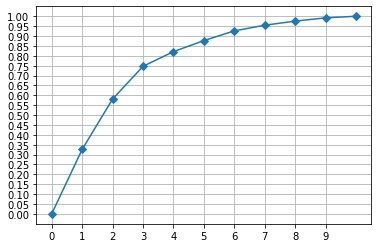

In [5]:
# 寄与率を求める
pca_col = ["PC{}".format(x + 1) for x in range(len(df_std.columns))]
df_con_ratio = pd.DataFrame([pca.explained_variance_ratio_], columns = pca_col)
print(df_con_ratio.head())

# 累積寄与率を図示する
cum_con_ratio = np.hstack([0, pca.explained_variance_ratio_]).cumsum()
plt.plot(cum_con_ratio, 'D-')
plt.xticks(range(10))
plt.yticks(np.arange(0,1.05,0.05))
plt.grid()
plt.show()

In [13]:
print("第二主成分までで累積寄与率は60%ほど。すごく良いとはいえないがこのまま第二主成分までを採用して進めてみる。")

第二主成分までで累積寄与率は60%ほど。すごく良いとはいえないがこのまま第二主成分までを採用して進めてみる。


          100m  long jump  shot put  high junp      400m     110mH  \
PC1   0.510959   0.545517 -0.007409   0.237159  0.369382  0.384518   
PC2   0.129726   0.067953  0.179004  -0.028354 -0.111857  0.174567   
PC3  -0.104976   0.051780  0.054415   0.134249 -0.230033 -0.028032   
PC4   0.116990  -0.137018 -0.214482   0.453699 -0.228404  0.002049   
PC5  -0.025611   0.600617 -0.435293  -0.062264 -0.423316 -0.004984   
PC6   0.699686  -0.223837  0.117638   0.107749  0.072478 -0.430477   
PC7   0.258684  -0.163682 -0.317492   0.178694 -0.499700 -0.138568   
PC8  -0.305626   0.283711 -0.145521   0.415812  0.386184 -0.639985   
PC9  -0.142174  -0.380170 -0.425080   0.433181  0.257378  0.440613   
PC10 -0.163192   0.116967  0.642612   0.557784 -0.310532  0.112364   

      discus throw  pole vault  javelin throw     1500m  
PC1      -0.105984    0.060007      -0.034692  0.291031  
PC2       0.296835    0.115832       0.865365 -0.228774  
PC3       0.185415    0.907204      -0.159437  0.169695

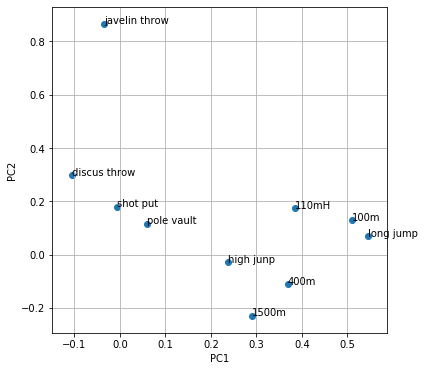

In [6]:
# 主成分負荷量を求める
df_pca = pd.DataFrame(pca_data, columns = pca_col)
df_pca_vec = pd.DataFrame(pca.components_, columns=df.columns,
                          index=["PC{}".format(x + 1) for x in range(len(df_pca.columns))])
print(df_pca_vec)

# 主成分負荷量を図示する
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], df.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1])
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
print("第一主成分は特に槍投げ、円盤投げ、砲丸投げなどの「投擲力」の総合力、第二主成分は特に100m、走り幅跳び、100mH、400mなどの「走力」の総合力になっていると考えられる。")

第一主成分は特に槍投げ、円盤投げ、砲丸投げなどの「投擲力」の総合力、第二主成分は特に100m、走り幅跳び、100mH、400mなどの「走力」の総合力になっていると考えられる。


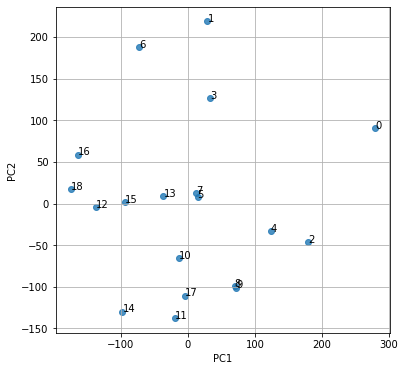

In [8]:
# 主成分得点を求める
plt.figure(figsize=(6, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
x = pca_data[:, 0]
y = pca_data[:, 1]
annotations = df_std.index
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))
plt.show()

In [12]:
print("csvファイルの作り方から、0が一位の人、1が二位の人、... というラベル付になっていると考えられる。これをみると、1,3,5位の人はPC1方向、つまり投擲力がより強く、2,4,7位の人はPC2方向、つまり走力がより強かったと理解できるだろう。しかしもちろん1位の人はPC2に関しても好成績なため、投擲力と走力、双方向にすばらしい能力を持っていたということが見てとれる。")

csvファイルの作り方から、0が一位の人、1が二位の人、... というラベル付になっていると考えられる。これをみると、1,3,5位の人はPC1方向、つまり投擲力がより強く、2,4,7位の人はPC2方向、つまり走力がより強かったと理解できるだろう。しかしもちろん1位の人はPC2に関しても好成績なため、投擲力と走力、双方向にすばらしい能力を持っていたということが見てとれる。


In [14]:
print("感想...今回、十種競技における「総合力」の分析をするために主成分分析を行った。その結果、十種競技では投擲力や走力が重要となるのだなということがわかった。このように分析のための変数を減らして説明をわかりやすくできるというのは主成分分析の良いところである、と改めて思う。累積寄与率がPC2までで60%くらいだったため、今度はPC3くらいまで採用してやってみるのが良いかも知れない。")

感想...今回、十種競技における「総合力」の分析をするために主成分分析を行った。その結果、十種競技では投擲力や走力が重要となるのだなということがわかった。このように分析のための変数を減らして説明をわかりやすくできるというのは主成分分析の良いところである、と改めて思う。累積寄与率がPC2までで60%くらいだったため、今度はPC3くらいまで採用してやってみるのが良いかも知れない。
